___
# PROJETO 1

## <font color='red'>Isabella Rocha de Oliveira</font>
___

## <font color='blue'>Desigualdade entre gêneros na terceira idade</font>

## Introdução

Ainda no século XXI é evidente a disparidade entre os salários da população masculina e feminina no Brasil. Pesquisas como a do 'Observatório Brasil de Igualdade de Gênero (http://www.observatoriodegenero.gov.br/menu/noticias/homens-recebem-salarios-30-maiores-que-as-mulheres-no-brasil) apontam que os homens recebem salários 30% maiores que os das mulheres no Brasil. Infelizmente esses dados não nos soam como novidade, porém pouco se sabe do contraste entre as rendas das populações aposentadas feminina e masculina. Esse projeto visa explorar dados que tragam uma conclusão a respeito desse cenário na terceira idade.

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Isabella\Documents\GitHub\CD\Projeto1


In [3]:
"""Vamos ler a estrutura da PNAD como um dataframe.
    São muitas colunas e precisamos usar a informação de tamanho para ler a PNAD de fato
    como uma base de tamanho fixo"""
estrutura = pd.read_table("pes_py.txt", sep=";")

In [4]:
estrutura.head()

,Coluna,Tamanho,Título
0,V0101,4,Ano de referência
1,UF,2,Unidade da Federação
2,V0102,6,Número de controle
3,V0103,3,Número de série
4,V0301,2,Número de ordem


In [5]:
# Se quiser uma leitura mais rápida, use o arquivo descompactado. Não esqueça de adicionar ao seu .gitignore
#pnad2014 = pd.read_fwf("PES2014.txt", widths=estrutura.Tamanho, header=None)

# Se quiser economizar espaço, use o arquivo Zip
pnad2014 = pd.read_fwf("PES2014.zip", widths=estrutura.Tamanho, header=None, compression="zip")

#pnad2014 = pd.read_csv('PES2014csv.zip', sep = ',')

In [200]:
estrutura.columns

Index(['Coluna', 'Tamanho', 'Título'], dtype='object')

In [201]:
pnad2014.columns = estrutura.Coluna

In [202]:
#V9122 - Aposentados
#V0302 - Sexo
#V8005 - idade
#V4011 - estados civil
#V4803 - anos de estudos
#V9861 - anos trabalhados no último emprego
#V1252 - Aposentadoria
#V1261 - Pensões

tabela = pnad2014.loc[:,('UF', 'V9122', 'V0302', 'V8005', 'V4011', 'V4803', 'V9861', 'V1252', 'V1260')]
tabela
tabela.columns = ['UF','Ap','Sexo','Idade','EstadoCivil','Estudo','Trabalho','Aposentadoria','Pensões']

#filtro aposentados V9122 sim:(2) e aposentadoria
dados = tabela[(tabela.Ap == 2.0) & (tabela.Aposentadoria < 99999)]

#filtro por sexo
dados.SexoMulheres = dados[(dados.Sexo == 4)]
dados.SexoHomens = dados[(dados.Sexo == 2)]

#####################################################################################
dados.Sexo = dados.Sexo.astype('category')
dados.Sexo.cat.categories = ('Homens', 'Mulheres')
dados.SexoMulheres.Pensões = dados.Pensões.astype('category')
dados.SexoMulheres.Pensões.cat.categories = ('Sim')

dados.SexoHomens.Pensões = dados.Pensões.astype('category')
dados.SexoHomens.Pensões.cat.categories = ('Sim')

C:\Users\Isabella\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Os dados foram recolhidos do arquivo PNAD 2014, disponível para download gratuito na internet. Eles foram tratados de modo à utilizarmos apenas os dados das pessoas que correspondem ao nosso perfil de interesse: aposentados, homens e mulheres.

Primeiramente, para fins de entendermos o cenário atual a ser estudado, vamos analisar a porcentagem dos dois sexos em relação à toda população aposentada. O gráfico de pizza foi escolhido para fazer essa representação pois é bem intuitivo e claro.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001718EA03828>], dtype=object)

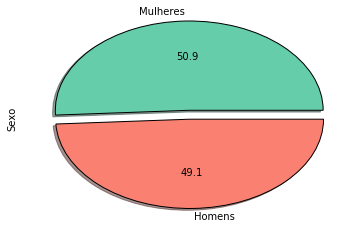

In [203]:
explode=(0.1,0)
C = dados.Sexo.value_counts()
C.plot(kind='pie', colors=('MediumAquamarine', 'Salmon'),shadow = True,  explode=explode, autopct="%0.1f",legend=False, subplots=True)

Para comparar as idades entre os sexos, as ferramentas escolhidas foram a tabela de frequências e boxplot pois eles nos mostram os valores máximos e mínimos, sua frequência, sua contagem, sua média, valores intermediários e muitos outras informações relevantes para nosso estudo.

In [204]:
dados.SexoMulheres.Idade.describe()

count    19336.000000
mean        67.499638
std         10.419214
min         11.000000
25%         61.000000
50%         67.000000
75%         74.000000
max        112.000000
Name: Idade, dtype: float64

In [205]:
dados.SexoHomens.Idade.describe()

count    18684.000000
mean        67.291586
std         10.700987
min         11.000000
25%         61.000000
50%         67.000000
75%         74.000000
max        108.000000
Name: Idade, dtype: float64

Aqui podemos ver que existem 19628 mulheres aposentadas enquanto há 19015 homens aposentados.
A média da idade dos aposentados é em torno de 67 anos, a mesma do que a das aposentadas.
O aposentado mais velho que respondeu a pesquisa foi uma mulher de 112 anos.

O boxplot abaixo é uma ótima forma de compararmos a variável escolhida nos dois gêneros e ele reitera o quanto os dados para as duas populações estudadas tem valores notáveis (média, picos, etc...) semelhantes.

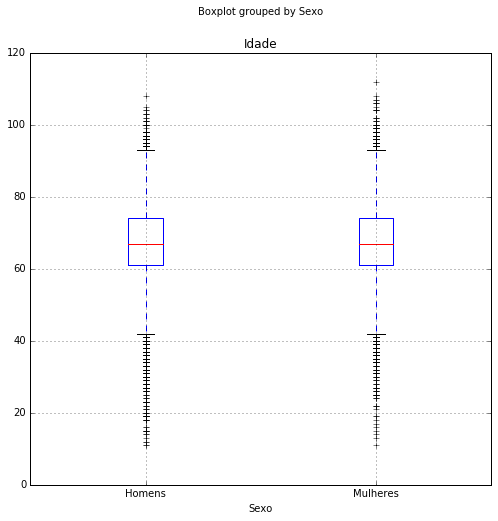

In [206]:
dados.boxplot(column= "Idade", by="Sexo", figsize=(8, 8))

Agora vamos analisar o estado civil dos aposentados. Eles são relevantes pois revelam muito sobre a composição familiar na qual o indivíduo está ou esteve inserido, o que nos permite fazer relações com outras variáveis, por exemplo: Uma aposentada casada tem altas chances de ter sido dona de casa a vida inteira e por isso não receber aposentadoria, ou, se for viúva, de receber algum tipo de pensão pela perda do(a) companheiro(a). Os gráficos abaixo nos ajudarão no futuro a estudar esses casos e possivelmente validá-los.

In [207]:
dados.EstadoCivil = dados.EstadoCivil.astype('category')
dados.EstadoCivil.cat.categories = ('Solteiro', 'Casado', 'Separado','Divorciado', 'Viúvo')
dados.EstadoCivil.value_counts()

C:\Users\Isabella\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Viúvo         7978
Solteiro      6250
Divorciado    2467
Casado        1911
Separado       851
Name: EstadoCivil, dtype: int64

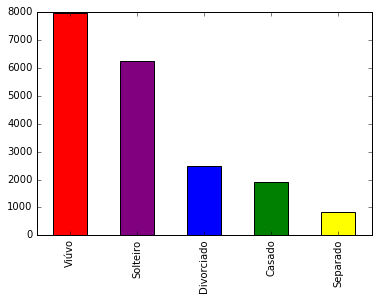

In [208]:
DEC = dados.EstadoCivil.value_counts()

DEC.plot(kind='bar', color=('Red', 'Purple', 'Blue', 'Green', 'Yellow'), legend=False)

Aqui podemos perceber que a maior parte da população aposentada é viúva, uma minoria é separada e uma quantidade surpreendente é solteira. 

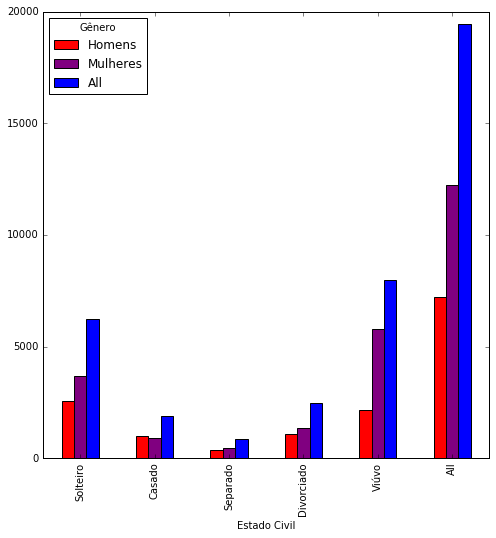

In [209]:
ECS = pd.crosstab(dados.EstadoCivil,dados.Sexo,margins=True,rownames=['Estado Civil'], colnames=['Gênero'])
ECS.plot(kind='bar', color=('Red', 'Purple', 'Blue', 'Green', 'Yellow'), legend=True, figsize = (8, 8))

Podemos perceber que uma grande parte do público feminino aposentado é viúva, enquanto na população masculina, a maioria é solteira.

Agora que temos a relação de gêneros com os respectivos estados civis, seria interessante uma implementação do recebimento de pensões, para analisarmos se o exemplo citado acima realmente é validado nesse cenário real.

C:\Users\Isabella\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


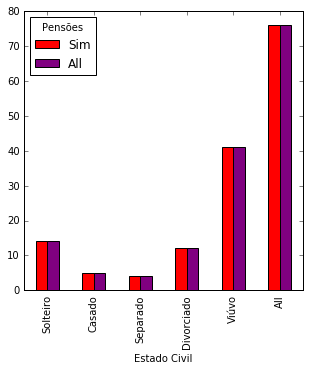

In [210]:
dados.SexoMulheres.EstadoCivil = dados.SexoMulheres.EstadoCivil.astype('category')
dados.SexoMulheres.EstadoCivil.cat.categories = ('Solteiro', 'Casado', 'Separado','Divorciado', 'Viúvo')
dados.SexoHomens.EstadoCivil = dados.SexoHomens.EstadoCivil.astype('category')
dados.SexoHomens.EstadoCivil.cat.categories = ('Solteiro', 'Casado', 'Separado','Divorciado', 'Viúvo')
MCT = pd.crosstab(dados.SexoMulheres.EstadoCivil,dados.SexoMulheres.Pensões,margins=True,rownames=['Estado Civil'], colnames=['Pensões'])
MCT.plot(kind='bar', color=('Red', 'Purple', 'Blue', 'Green', 'Yellow'), legend=True, figsize = (5, 5))

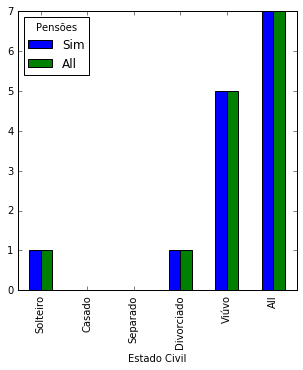

In [211]:
HCT = pd.crosstab(dados.SexoHomens.EstadoCivil,dados.SexoHomens.Pensões,margins=True,rownames=['Estado Civil'], colnames=['Pensões'])
HCT.plot(kind='bar', color=('Blue', 'Green', 'Yellow'), legend=True, figsize = (5, 5))

Aqui analisamos a relação sexo, estado civil e recebimento de pensões além da aposentadoria. Nos 2 últimos gráficos, como a resposta de que não recebe pensão é nulo, a contabilização do total de pessoas corresponde exatamente ao número das pessoas que recebem pensão, pois essa é a única resposta válida.

Vamos analisar agora a relação da idade e o valor da aposentadoria recebida pelas populações de ambos os sexos. Gráficos de dispersão são uma boaescolha pra analisarmos essas variáveis juntas pois ele mostra de forma intuitiva o cenário estudado em sua totalidade, podemos ver todos os dados juntos e analisarmos como eles se dispersam e onde estão concentrados.

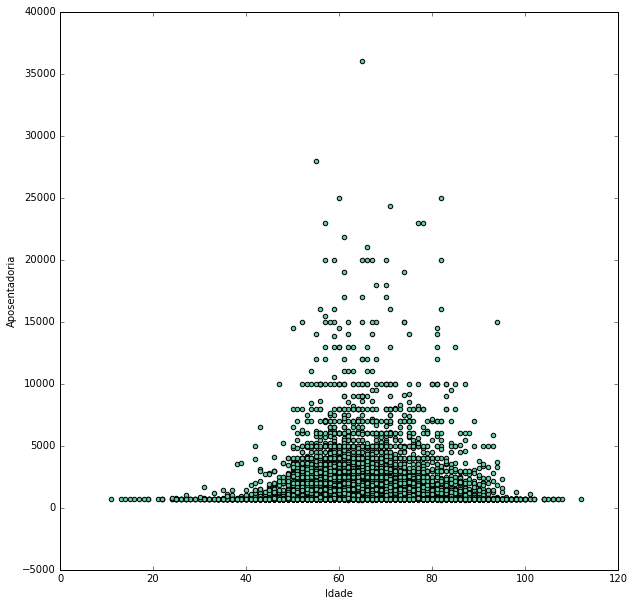

In [212]:
dados.SexoMulheres.plot(kind='scatter', x='Idade', y='Aposentadoria', figsize=(10,10), color='MediumAquaMarine');

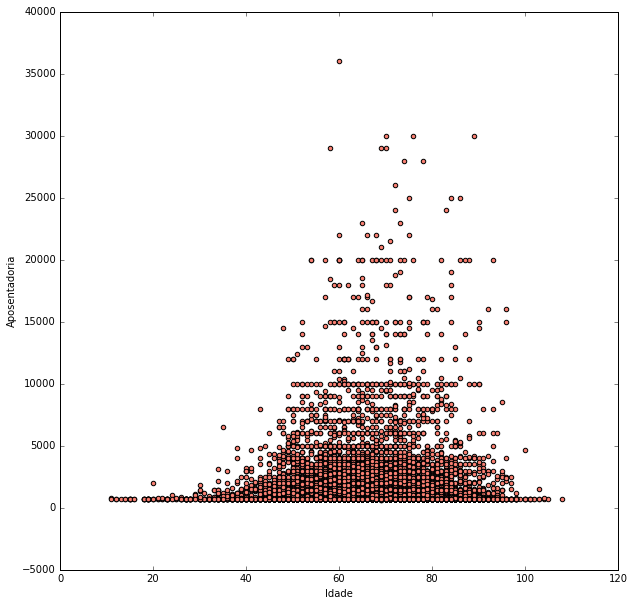

In [213]:
dados.SexoHomens.plot(kind='scatter', x='Idade', y='Aposentadoria', figsize=(10,10), color='Salmon');

In [214]:
dados.SexoMulheres.Aposentadoria.describe()

count    19336.000000
mean      1213.348469
std       1486.175068
min        610.000000
25%        724.000000
50%        724.000000
75%        900.000000
max      36000.000000
Name: Aposentadoria, dtype: float64

In [215]:
dados.SexoHomens.Aposentadoria.describe()

count    18684.000000
mean      1528.544316
std       2031.017617
min        622.000000
25%        724.000000
50%        724.000000
75%       1500.000000
max      36000.000000
Name: Aposentadoria, dtype: float64

Agora vamos estudar como a variável "Anos de estudo" se apresentam em ambos os sexos. Utilizaremos histogramas para vermos de forma clara, intuitiva e de fácil comparação.

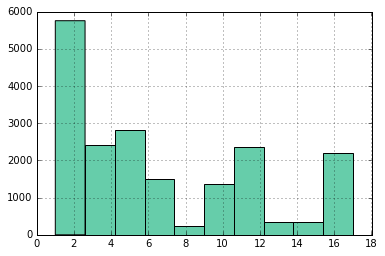

In [216]:
dados.SexoMulheres.Estudo.hist(color = 'MediumAquaMarine') 

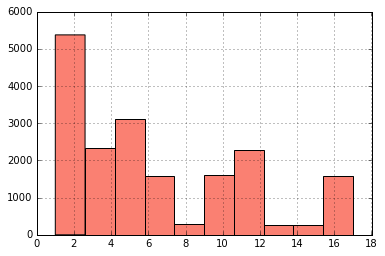

In [217]:
dados.SexoHomens.Estudo.hist(color = 'Salmon')

In [218]:
dados.SexoMulheres.Estudo.describe()

count    19336.000000
mean         6.494053
std          5.139640
min          1.000000
25%          1.000000
50%          5.000000
75%         12.000000
max         17.000000
Name: Estudo, dtype: float64

In [219]:
dados.SexoHomens.Estudo.describe()

count    18684.000000
mean         6.232820
std          4.805544
min          1.000000
25%          1.000000
50%          5.000000
75%          9.000000
max         17.000000
Name: Estudo, dtype: float64

Abaixo veremos como as variáveis 'Anos Estudados' e 'Valor da aposentadoria' se comportam juntos em um gráfico de dispersão para ambos os gêneros.
Boxplots seriam a ferramente mais indicada para usarmos nesse estudo, porém ao plotarmos um, os valores 'outliners' não são muito evidenciados e eles serão interessantes para o nosso estudo, mesmo não dizendo muito sobre a totalidade da população, pois são exceções.

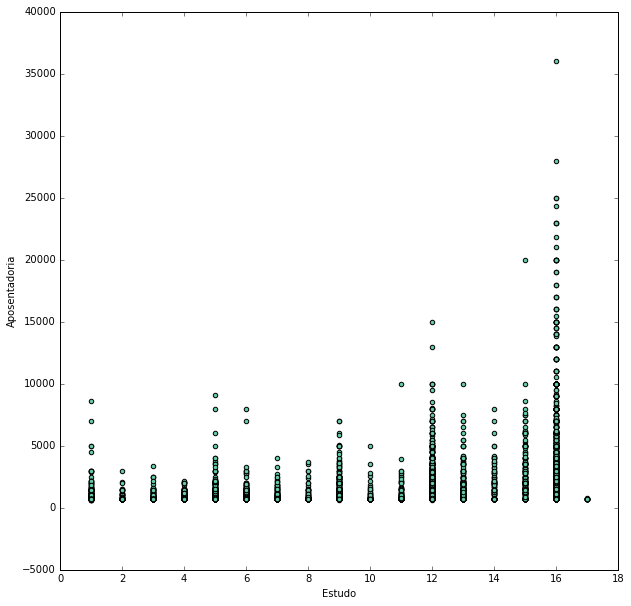

In [220]:
dados.SexoMulheres.plot(kind='scatter', x='Estudo', y='Aposentadoria', figsize=(10,10), color='MediumAquaMarine');

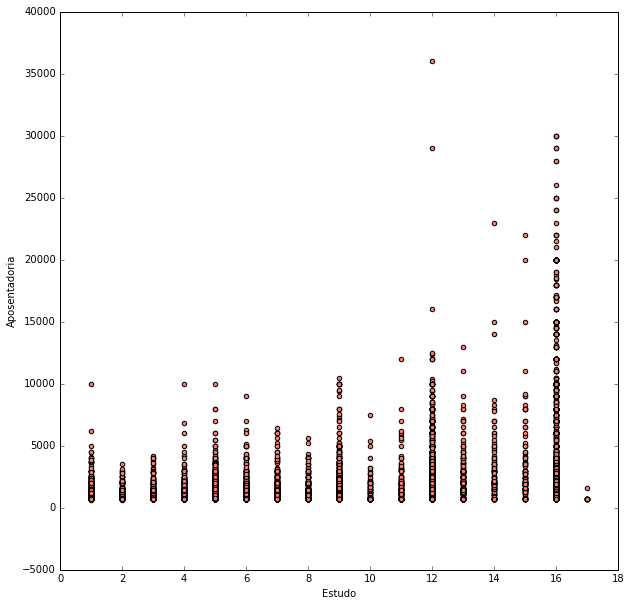

In [221]:
dados.SexoHomens.plot(kind='scatter', x='Estudo', y='Aposentadoria', figsize=(10,10), color='Salmon');

Agora veremos como a aposentadoria de cada sexo se comporta ao ser avaliada com a variável 'Anos trabalhados no último emprego' em gráficos de dispersão.

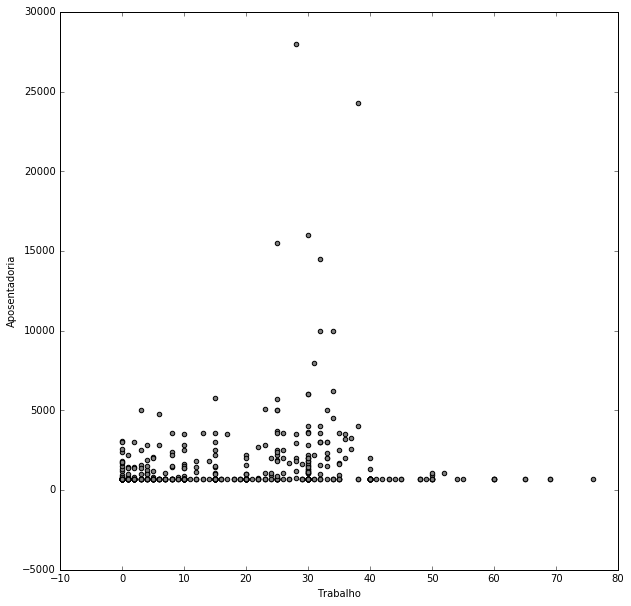

In [222]:
dados.SexoMulheres.plot(kind='scatter', x='Trabalho', y='Aposentadoria', figsize=(10,10), color='Gray');

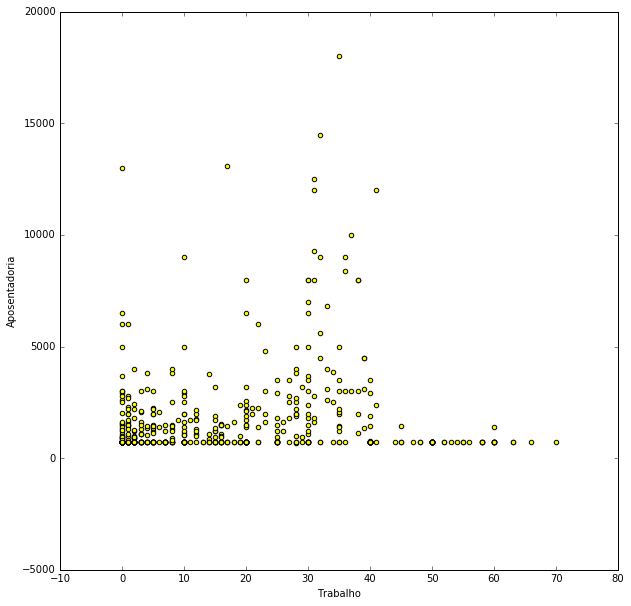

In [224]:
dados.SexoHomens.plot(kind='scatter', x='Trabalho', y='Aposentadoria', figsize=(10,10), color='Yellow');

In [225]:
dados.SexoMulheres.Trabalho.describe()

C:\Users\Isabella\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


count    491.000000
mean      18.694501
std       15.339836
min        0.000000
25%             NaN
50%             NaN
75%             NaN
max       76.000000
Name: Trabalho, dtype: float64

In [226]:
dados.SexoHomens.Trabalho.describe()

C:\Users\Isabella\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


count    535.000000
mean      17.805607
std       16.978935
min        0.000000
25%             NaN
50%             NaN
75%             NaN
max       70.000000
Name: Trabalho, dtype: float64

___
## Conclusão 

Os extensivos estudos sobre as diferentes variáveis nos permitiram chegar a diversas conclusões.

#### Sobre o cenário atual, sem analisarmos a questão abordada:

A maioria das pessoas aposentadas no Brasil não estão em um matrimônio. Isso, associado ao fato de que casais que continuam em matrimônio quando aposentados podem dividir os gastos, diminuindo assim as despesas e aumentando a qualidade vida nos mostra que a qualidade de vida dos aposentados está sendo impactada por a maioria precisar arcar sozinha com suas despesas.

Há uma boa distribuição da população aposentada entre os sexos, sendo 49,1% homens e 50,9% mulheres.

#### Sobre o tema abordado na pesquisa:

Podemos perceber uma possível validação do exemplo acima citado da relação entre o recebimento de outras pensões (além da aposentadoria) e o estado civil no nosso gráfico Estado Civil X Pessoas que recebem pensões: a maioria das mulheres que a recebem são viúvas, podendo ter como motivo de recebimento da pensão a morte dos antigos maridos, porém também é mais frequente o recebimento de pensões pelos homens viúvos do que nos outros estados civis. As mulheres aposentadas recebem muito mais pensões, se comparadas com os homens aposentados.

Ao estudarmos a relação da idade dos aposentados com os respectivos valores de suas aposentadorias, podemos perceber que há uma maior densidade de homens que recebem um valor de aposentadoria maior do que em comparação com as mesmas idades das mulheres e a faixa de idade deles em cada valor de aposentadoria apresenta-se maior do que a densidade delas. Ou seja, eles recebem mais com as mesmas idades do que elas.

O quartil 75% e a média de anos estudados da população feminina aposentada apresenta-se maior do que a dos homens. E a frequência de mulheres que estudaram por 16 anos também é maior do que a dos homens. Porém, há mais mulheres que estudaram menos de 3 anos do que os homens, o que pode ter relação com o fato de que as mulheres, principalmente no passado, não eram tão instruídas à estudar quanto os homens, pois costumavam comandar os trabalhos domésticos.

Ao relacionarmos esses anos estudados com os valores recebidos de aposentadoria para cada sexo, percebemos que mais homens recebem aposentadorias mais altas do que mulheres, ambos com as mesmas idades. Por exemplo, as mulheres só passam a receber mais de R$ 10.000 de aposentadoria acima dos 12 anos de estudo, enquanto nos homens essa faixa é atingida desde as pessoas que estudaram apenas 1 ano.

Percebemos também nos gráficos seguintes que mais homens com poucos anos de trabalho no último emprego recebem valores mais altos de aposentadorias do que as mulheres com mesmo tempo de trabalho no último emprego.

Os dados das idades dos diferentes gêneros são bem semelhantes, tendo os mesmos valores de média, portanto não revelam muito sobre a expectativa de vida entre os sexos, o que seriam informações interessantes para associarmos à renda de cada. 

Esses resultados nos mostram que a desigualdade salarial entre os gêneros também é refletida na população aposentada. Nem mais anos de trabalho no mesmo emprego ou mais anos de estudo que são fatores relacionados à mérito pessoal são livres dessa desigualdade. Há uma tendência entre mulheres aposentadas a receberem menos do que os homens, independente do quanto se esforçam, do quanto trabalham e do quanto merecem. O único fator que as fazem recebem mais do que os homens são as pensões à parte da aposentadoria, que podem ser oriundas das mortes de seus maridos.

Fatos históricos como a falta de incentivo aos estudos para com as mulheres (principalmente no passado e em regiões mais carentes), os trabalhos domésticos serem destinados majoritariamente a elas e, desde sempre até a atualidade, o preconceito em relação às mulheres no mercado de trabalho. Ele é visto com muito destaque no cenário jovem atual, porém tem raízes profundas e antigas que impactaram até as gerações mais antigas.